# Duet Benchmarking Result Evaluation And Boxplot Creation

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os
from pathlib import Path
import scipy.stats as st

### Import Benchmarking All Measurements as csv file and create Pandas Dataframe for further Analysis

In [29]:
setup1 = False
average = False

# 2000 gut für setup2; 2 für setup1 (schlechter aber noch als ohne averagen)
interval=2000
shift=-1000

#### A/A

In [30]:
if(setup1): 
    part1="Setup1"
    part2="1.25mCops_4t"
else: 
    part1="Setup2"
    part2="1mAops_4t"
    
cwd = Path.cwd()
filepath = os.path.join(cwd, "Results", part1, part2,"AA", "run_measurements1.csv")

df1AA = pd.read_csv(filepath)

filepath = os.path.join(cwd, "Results", part1, part2, "AA","run_measurements2.csv")

df2AA = pd.read_csv(filepath)

filepath = os.path.join(cwd, "Results", part1, part2, "AA", "run_measurements3.csv")

df3AA = pd.read_csv(filepath)

#### A/B

In [31]:
cwd = Path.cwd()
filepath = os.path.join(cwd, "Results", part1, part2,"AB", "run_measurements1.csv")

df1AB = pd.read_csv(filepath)

filepath = os.path.join(cwd, "Results", part1, part2, "AB","run_measurements2.csv")

df2AB = pd.read_csv(filepath)

filepath = os.path.join(cwd, "Results", part1, part2, "AB", "run_measurements3.csv")

df3AB = pd.read_csv(filepath)

### CUT Measurements

#### Restructure Timeline

In [32]:
firstSent = df1AA["sent"].min()
df1AA["sent_sec"] = (df1AA["sent"] - firstSent)/1000000/1000
firstSent = df2AA["sent"].min()
df2AA["sent_sec"] = (df2AA["sent"] - firstSent)/1000000/1000
firstSent = df3AA["sent"].min()
df3AA["sent_sec"] = (df3AA["sent"] - firstSent)/1000000/1000

firstSent = df1AB["sent"].min()
df1AB["sent_sec"] = (df1AB["sent"] - firstSent)/1000000/1000
firstSent = df2AB["sent"].min()
df2AB["sent_sec"] = (df2AB["sent"] - firstSent)/1000000/1000
firstSent = df3AB["sent"].min()
df3AB["sent_sec"] = (df3AB["sent"] - firstSent)/1000000/1000

#### Prune Measurements 

In [33]:
if(setup1): 
    endTime = 850
else: 
    endTime = 600
    
df1AA = df1AA.loc[(df1AA["sent_sec"] > 200) & (df1AA["sent_sec"] < endTime)]
df2AA = df2AA.loc[(df2AA["sent_sec"] > 200) & (df2AA["sent_sec"] < endTime)]
df3AA = df3AA.loc[(df3AA["sent_sec"] > 200) & (df3AA["sent_sec"] < endTime)]

df1AB = df1AB.loc[(df1AB["sent_sec"] > 200) & (df1AB["sent_sec"] < endTime)]
df2AB = df2AB.loc[(df2AB["sent_sec"] > 200) & (df2AB["sent_sec"] < endTime)]
df3AB = df3AB.loc[(df3AB["sent_sec"] > 200) & (df3AB["sent_sec"] < endTime)]

In [34]:
df1AA["latency_ms"] = (df1AA["received"] - df1AA["sent"])/1000000
df2AA["latency_ms"] = (df2AA["received"] - df2AA["sent"])/1000000
df3AA["latency_ms"] = (df3AA["received"] - df3AA["sent"])/1000000
df1AB["latency_ms"] = (df1AB["received"] - df1AB["sent"])/1000000
df2AB["latency_ms"] = (df2AB["received"] - df2AB["sent"])/1000000
df3AB["latency_ms"] = (df3AB["received"] - df3AB["sent"])/1000000

In [35]:
dfA1AA = df1AA.loc[(df1AA["workerId"] == "w1-vA") | (df1AA["workerId"] == "w2-vA") | (df1AA["workerId"] == "w3-vA")]
dfA2AA = df2AA.loc[(df2AA["workerId"] == "w1-vA") | (df2AA["workerId"] == "w2-vA") | (df2AA["workerId"] == "w3-vA")]
dfA3AA = df3AA.loc[(df3AA["workerId"] == "w1-vA") | (df3AA["workerId"] == "w2-vA") | (df3AA["workerId"] == "w3-vA")]

dfB1AA = df1AA.loc[(df1AA["workerId"] == "w1-vB") | (df1AA["workerId"] == "w2-vB") | (df1AA["workerId"] == "w3-vB")]
dfB2AA = df2AA.loc[(df2AA["workerId"] == "w1-vB") | (df2AA["workerId"] == "w2-vB") | (df2AA["workerId"] == "w3-vB")]
dfB3AA = df3AA.loc[(df3AA["workerId"] == "w1-vB") | (df3AA["workerId"] == "w2-vB") | (df3AA["workerId"] == "w3-vB")]


dfA1AB = df1AB.loc[(df1AB["workerId"] == "w1-vA") | (df1AB["workerId"] == "w2-vA") | (df1AB["workerId"] == "w3-vA")]
dfA2AB = df2AB.loc[(df2AB["workerId"] == "w1-vA") | (df2AB["workerId"] == "w2-vA") | (df2AB["workerId"] == "w3-vA")]
dfA3AB = df3AB.loc[(df3AB["workerId"] == "w1-vA") | (df3AB["workerId"] == "w2-vA") | (df3AB["workerId"] == "w3-vA")]

dfB1AB = df1AB.loc[(df1AB["workerId"] == "w1-vB") | (df1AB["workerId"] == "w2-vB") | (df1AB["workerId"] == "w3-vB")]
dfB2AB = df2AB.loc[(df2AB["workerId"] == "w1-vB") | (df2AB["workerId"] == "w2-vB") | (df2AB["workerId"] == "w3-vB")]
dfB3AB = df3AB.loc[(df3AB["workerId"] == "w1-vB") | (df3AB["workerId"] == "w2-vB") | (df3AB["workerId"] == "w3-vB")]

dfA1AA.head()

,workerId,queryType,queryId,sent,received,target-region,sent_sec,latency_ms
153860,w1-vA,SELECT,744144,3178922886576,3178935019153,europe-west1,200.026494,12.132577
153861,w1-vA,SELECT,412038,3178923173936,3178935137487,europe-west1,200.026781,11.963551
153862,w1-vA,UPDATE,77319,3178932895835,3178936714696,europe-west1,200.036503,3.818861
153863,w1-vA,UPDATE,412041,3178935139451,3178936789408,europe-west1,200.038747,1.649957
153867,w1-vA,SELECT,744147,3178935025236,3178938005213,europe-west1,200.038633,2.979977


In [36]:
dfA1AA = dfA1AA.rename(columns={"latency_ms":"latency_ms_A"})
dfA2AA = dfA2AA.rename(columns={"latency_ms":"latency_ms_A"})
dfA3AA = dfA3AA.rename(columns={"latency_ms":"latency_ms_A"})

dfA1AB=dfA1AB.rename(columns={"latency_ms":"latency_ms_A"})
dfA2AB=dfA2AB.rename(columns={"latency_ms":"latency_ms_A"})
dfA3AB=dfA3AB.rename(columns={"latency_ms":"latency_ms_A"})


dfB1AA=dfB1AA.rename(columns={"latency_ms":"latency_ms_B"})
dfB2AA=dfB2AA.rename(columns={"latency_ms":"latency_ms_B"})
dfB3AA=dfB3AA.rename(columns={"latency_ms":"latency_ms_B"})

dfB1AB=dfB1AB.rename(columns={"latency_ms":"latency_ms_B"})
dfB2AB=dfB2AB.rename(columns={"latency_ms":"latency_ms_B"})
dfB3AB=dfB3AB.rename(columns={"latency_ms":"latency_ms_B"})


dfA1AA=dfA1AA.drop(["workerId", "sent", "received", "target-region"], axis=1)
dfA2AA=dfA2AA.drop(["workerId", "sent", "received", "target-region"], axis=1)
dfA3AA=dfA3AA.drop(["workerId", "sent", "received", "target-region"], axis=1)

dfA1AB=dfA1AB.drop(["workerId", "sent", "received", "target-region"], axis=1)
dfA2AB=dfA2AB.drop(["workerId", "sent", "received", "target-region"], axis=1)
dfA3AB=dfA3AB.drop(["workerId", "sent", "received", "target-region"], axis=1)


dfB1AA=dfB1AA.drop(["workerId", "sent", "received", "target-region"], axis=1)
dfB2AA=dfB2AA.drop(["workerId", "sent", "received", "target-region"], axis=1)
dfB3AA=dfB3AA.drop(["workerId", "sent", "received", "target-region"], axis=1)

dfB1AB=dfB1AB.drop(["workerId", "sent", "received", "target-region"], axis=1)
dfB2AB=dfB2AB.drop(["workerId", "sent", "received", "target-region"], axis=1)
dfB3AB=dfB3AB.drop(["workerId", "sent", "received", "target-region"], axis=1)

In [37]:
dfA1AB.describe()


,queryId,sent_sec,latency_ms_A
count,453610.000000,453610.000000,453610.000000
mean,483274.683836,391.049250,7.933992
std,276276.076837,114.815826,24.768793
min,70659.000000,200.000131,0.504697
25%,186900.250000,291.251628,1.222015
50%,482232.500000,382.956708,1.516857
75%,779139.750000,490.921812,2.250540
max,899348.000000,599.998709,495.749818


In [38]:
dfB1AB.describe()

,queryId,sent_sec,latency_ms_B
count,542419.000000,542419.000000,542419.000000
mean,530622.128530,393.466663,6.635574
std,278752.357395,115.296749,22.827402
min,92556.000000,200.000557,0.462858
25%,240551.500000,293.286861,1.257532
50%,527126.000000,388.219976,1.569240
75%,817916.500000,493.692803,2.188146
max,995519.000000,599.997133,636.809932


### Merge Dataframe of different Runs for A/A and A/B by QueryIds

In [39]:
queryDfAA1 = pd.merge(left=dfA1AA, right=dfB1AA, left_on=['queryId', 'queryType'], right_on=['queryId', 'queryType'])
queryDfAA2 = pd.merge(left=dfA2AA, right=dfB2AA, left_on=['queryId', 'queryType'], right_on=['queryId', 'queryType'])
queryDfAA3 = pd.merge(left=dfA3AA, right=dfB3AA, left_on=['queryId', 'queryType'], right_on=['queryId', 'queryType'])

queryDfAB1 = pd.merge(left=dfA1AB, right=dfB1AB, left_on=['queryId', 'queryType'], right_on=['queryId', 'queryType'])
queryDfAB2 = pd.merge(left=dfA2AB, right=dfB2AB, left_on=['queryId', 'queryType'], right_on=['queryId', 'queryType'])
queryDfAB3 = pd.merge(left=dfA3AB, right=dfB3AB, left_on=['queryId', 'queryType'], right_on=['queryId', 'queryType'])

In [40]:
if not setup1:
    queryDfAA1Update = queryDfAA1.loc[(queryDfAA1["queryType"] == "UPDATE")]
    queryDfAA2Update = queryDfAA2.loc[(queryDfAA2["queryType"] == "UPDATE")]
    queryDfAA3Update = queryDfAA3.loc[(queryDfAA3["queryType"] == "UPDATE")]
    queryDfAB1Update = queryDfAB1.loc[(queryDfAB1["queryType"] == "UPDATE")]
    queryDfAB2Update = queryDfAB2.loc[(queryDfAB2["queryType"] == "UPDATE")]
    queryDfAB3Update = queryDfAB3.loc[(queryDfAB3["queryType"] == "UPDATE")]
                                      
    queryDfAA1Read = queryDfAA1.loc[(queryDfAA1["queryType"] == "SELECT")]
    queryDfAA2Read = queryDfAA2.loc[(queryDfAA2["queryType"] == "SELECT")]
    queryDfAA3Read = queryDfAA3.loc[(queryDfAA3["queryType"] == "SELECT")]
    queryDfAB1Read = queryDfAB1.loc[(queryDfAB1["queryType"] == "SELECT")]
    queryDfAB2Read = queryDfAB2.loc[(queryDfAB2["queryType"] == "SELECT")]
    queryDfAB3Read = queryDfAB3.loc[(queryDfAB3["queryType"] == "SELECT")]
    

In [41]:
if setup1: 
    queryDfAA1["averaged_A"] = queryDfAA1.latency_ms_A.rolling(interval).mean().shift(shift)
    queryDfAA2["averaged_A"] = queryDfAA2.latency_ms_A.rolling(interval).mean().shift(shift)
    queryDfAA3["averaged_A"] = queryDfAA3.latency_ms_A.rolling(interval).mean().shift(shift)

    queryDfAB1["averaged_A"] = queryDfAB1.latency_ms_A.rolling(interval).mean().shift(shift)
    queryDfAB2["averaged_A"] = queryDfAB2.latency_ms_A.rolling(interval).mean().shift(shift)
    queryDfAB3["averaged_A"] = queryDfAB3.latency_ms_A.rolling(interval).mean().shift(shift)

    queryDfAA1["averaged_B"] = queryDfAA1.latency_ms_B.rolling(interval).mean().shift(shift)
    queryDfAA2["averaged_B"] = queryDfAA2.latency_ms_B.rolling(interval).mean().shift(shift)
    queryDfAA3["averaged_B"] = queryDfAA3.latency_ms_B.rolling(interval).mean().shift(shift)

    queryDfAB1["averaged_B"] = queryDfAB1.latency_ms_B.rolling(interval).mean().shift(shift)
    queryDfAB2["averaged_B"] = queryDfAB2.latency_ms_B.rolling(interval).mean().shift(shift)
    queryDfAB3["averaged_B"] = queryDfAB3.latency_ms_B.rolling(interval).mean().shift(shift)

In [42]:

if not setup1:
    queryDfAA1Read["averaged_A"] = queryDfAA1Read.latency_ms_A.rolling(interval).mean().shift(shift)
    queryDfAA2Read["averaged_A"] = queryDfAA2Read.latency_ms_A.rolling(interval).mean().shift(shift)
    queryDfAA3Read["averaged_A"] = queryDfAA3Read.latency_ms_A.rolling(interval).mean().shift(shift)

    queryDfAB1Read["averaged_A"] = queryDfAB1Read.latency_ms_A.rolling(interval).mean().shift(shift)
    queryDfAB2Read["averaged_A"] = queryDfAB2Read.latency_ms_A.rolling(interval).mean().shift(shift)
    queryDfAB3Read["averaged_A"] = queryDfAB3Read.latency_ms_A.rolling(interval).mean().shift(shift)

    queryDfAA1Read["averaged_B"] = queryDfAA1Read.latency_ms_B.rolling(interval).mean().shift(shift)
    queryDfAA2Read["averaged_B"] = queryDfAA2Read.latency_ms_B.rolling(interval).mean().shift(shift)
    queryDfAA3Read["averaged_B"] = queryDfAA3Read.latency_ms_B.rolling(interval).mean().shift(shift)

    queryDfAB1Read["averaged_B"] = queryDfAB1Read.latency_ms_B.rolling(interval).mean().shift(shift)
    queryDfAB2Read["averaged_B"] = queryDfAB2Read.latency_ms_B.rolling(interval).mean().shift(shift)
    queryDfAB3Read["averaged_B"] = queryDfAB3Read.latency_ms_B.rolling(interval).mean().shift(shift)
    
    queryDfAA1Update["averaged_A"] = queryDfAA1Update.latency_ms_A.rolling(interval).mean().shift(shift)
    queryDfAA2Update["averaged_A"] = queryDfAA2Update.latency_ms_A.rolling(interval).mean().shift(shift)
    queryDfAA3Update["averaged_A"] = queryDfAA3Update.latency_ms_A.rolling(interval).mean().shift(shift)

    queryDfAB1Update["averaged_A"] = queryDfAB1Update.latency_ms_A.rolling(interval).mean().shift(shift)
    queryDfAB2Update["averaged_A"] = queryDfAB2Update.latency_ms_A.rolling(interval).mean().shift(shift)
    queryDfAB3Update["averaged_A"] = queryDfAB3Update.latency_ms_A.rolling(interval).mean().shift(shift)

    queryDfAA1Update["averaged_B"] = queryDfAA1Update.latency_ms_B.rolling(interval).mean().shift(shift)
    queryDfAA2Update["averaged_B"] = queryDfAA2Update.latency_ms_B.rolling(interval).mean().shift(shift)
    queryDfAA3Update["averaged_B"] = queryDfAA3Update.latency_ms_B.rolling(interval).mean().shift(shift)

    queryDfAB1Update["averaged_B"] = queryDfAB1Update.latency_ms_B.rolling(interval).mean().shift(shift)
    queryDfAB2Update["averaged_B"] = queryDfAB2Update.latency_ms_B.rolling(interval).mean().shift(shift)
    queryDfAB3Update["averaged_B"] = queryDfAB3Update.latency_ms_B.rolling(interval).mean().shift(shift)

C:\Users\Felix Medicus\AppData\Local\Temp\ipykernel_11464\3142437959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  queryDfAA1Read["averaged_A"] = queryDfAA1Read.latency_ms_A.rolling(interval).mean().shift(shift)
C:\Users\Felix Medicus\AppData\Local\Temp\ipykernel_11464\3142437959.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  queryDfAA2Read["averaged_A"] = queryDfAA2Read.latency_ms_A.rolling(interval).mean().shift(shift)
C:\Users\Felix Medicus\AppData\Local\Temp\ipykernel_11464\3142437959.py:4: S

### Introduce Latency Ratio

In [43]:
def calcRatio (row):
    
    if not average: 
        if row['latency_ms_A']>=row['latency_ms_B']:
            return (row['latency_ms_A']/row['latency_ms_B'])-1
        if row['latency_ms_A']<row['latency_ms_B']:
            return -1*((row['latency_ms_B']/row['latency_ms_A'])-1)
    
    else: 
        if row['averaged_A']>=row['averaged_B']:
            return (row['averaged_A']/row['averaged_B'])-1
        if row['averaged_A']<row['averaged_B']:
            return -1*((row['averaged_B']/row['averaged_A'])-1)

In [44]:
if setup1:
    queryDfAA1["latency_ratio"] = queryDfAA1.apply (lambda row: calcRatio(row), axis=1)
    queryDfAA2["latency_ratio"] = queryDfAA2.apply (lambda row: calcRatio(row), axis=1)
    queryDfAA3["latency_ratio"] = queryDfAA3.apply (lambda row: calcRatio(row), axis=1)

    queryDfAB1["latency_ratio"] = queryDfAB1.apply (lambda row: calcRatio(row), axis=1)
    queryDfAB2["latency_ratio"] = queryDfAB2.apply (lambda row: calcRatio(row), axis=1)
    queryDfAB3["latency_ratio"] = queryDfAB3.apply (lambda row: calcRatio(row), axis=1)

if not setup1: 
    queryDfAA1Update["latency_ratio"] = queryDfAA1Update.apply (lambda row: calcRatio(row), axis=1)
    queryDfAA2Update["latency_ratio"] = queryDfAA2Update.apply (lambda row: calcRatio(row), axis=1)
    queryDfAA3Update["latency_ratio"] = queryDfAA3Update.apply (lambda row: calcRatio(row), axis=1)
    queryDfAB1Update["latency_ratio"] = queryDfAB1Update.apply (lambda row: calcRatio(row), axis=1)
    queryDfAB2Update["latency_ratio"] = queryDfAB2Update.apply (lambda row: calcRatio(row), axis=1)
    queryDfAB3Update["latency_ratio"] = queryDfAB3Update.apply (lambda row: calcRatio(row), axis=1)

    queryDfAA1Read["latency_ratio"] = queryDfAA1Read.apply (lambda row: calcRatio(row), axis=1)
    queryDfAA2Read["latency_ratio"] = queryDfAA2Read.apply (lambda row: calcRatio(row), axis=1)
    queryDfAA3Read["latency_ratio"] = queryDfAA3Read.apply (lambda row: calcRatio(row), axis=1)
    queryDfAB1Read["latency_ratio"] = queryDfAB1Read.apply (lambda row: calcRatio(row), axis=1)
    queryDfAB2Read["latency_ratio"] = queryDfAB2Read.apply (lambda row: calcRatio(row), axis=1)
    queryDfAB3Read["latency_ratio"] = queryDfAB3Read.apply (lambda row: calcRatio(row), axis=1)



C:\Users\Felix Medicus\AppData\Local\Temp\ipykernel_11464\2136731286.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  queryDfAA1Update["latency_ratio"] = queryDfAA1Update.apply (lambda row: calcRatio(row), axis=1)
C:\Users\Felix Medicus\AppData\Local\Temp\ipykernel_11464\2136731286.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  queryDfAA2Update["latency_ratio"] = queryDfAA2Update.apply (lambda row: calcRatio(row), axis=1)
C:\Users\Felix Medicus\AppData\Local\Temp\ipykernel_11464\2136731286.py:13: 

In [45]:
if not setup1:
    queryDfAB1Update.describe()

## Create Boxplot

In [46]:
if setup1: 
    combined_dfs = pd.DataFrame({"A/A: Run 1": queryDfAA1['latency_ratio'],
                                "A/A: Run 2": queryDfAA2['latency_ratio'], 
                                "A/A: Run 3": queryDfAA3['latency_ratio'], 
                                "A/B: Run 1": queryDfAB1['latency_ratio'], 
                                "A/B: Run 2": queryDfAB2['latency_ratio'], 
                                "A/B: Run 3": queryDfAB3['latency_ratio']})

    sns.set_style('white')
    sns.set_context('notebook', font_scale=2.50)

    
    
    sns.set_palette("pastel")
    my_pal = {"A/A: Run 1": "lightsteelblue", "A/A: Run 2": "lightsteelblue", "A/A: Run 3":"lightsteelblue", "A/B: Run 1": "rosybrown", "A/B: Run 2": "rosybrown", "A/B: Run 3": "rosybrown"}
    box_plot = sns.boxplot(data=combined_dfs, color='white', showfliers=False, whis=1.5,palette=my_pal).set_title("Evaluation of Reads of first Setup")





    ax = box_plot.axes
    ax.set_ylabel("Latency Ratio")
    lines = ax.get_lines()

    categories = ax.get_xticks()

    for i in range(0,5):
        for cat in categories:

            y = round(lines[(i+cat*5)].get_ydata()[0],2) 

            match i:
                case 0:
                    posh= 'left'
                    posv= 'center'
                case 1: 
                    posh='left'
                    posv='center'
                case 2:
                    posh='right'
                    posv='center'
                case 4:
                    posh='right'
                    posv='center'
                case _: 
                    posh='center'
                    posv='center'


            ax.text(
                cat, 
                y, 
                f'{y}', 
                ha=posh, 
                va=posv, 
                fontweight='bold', 
                size=18,
                color='white',
                bbox=dict(facecolor='#445A64'))

    plt.axhline(y = 0,color='r',linewidth=4)
    plt.text(-0.5,-8.3,'A: Cassandra 4.0.4\nB: Cassandra 3.0.27')

    #sns.despine()
    sns.set(rc={'figure.figsize':(30,15)})



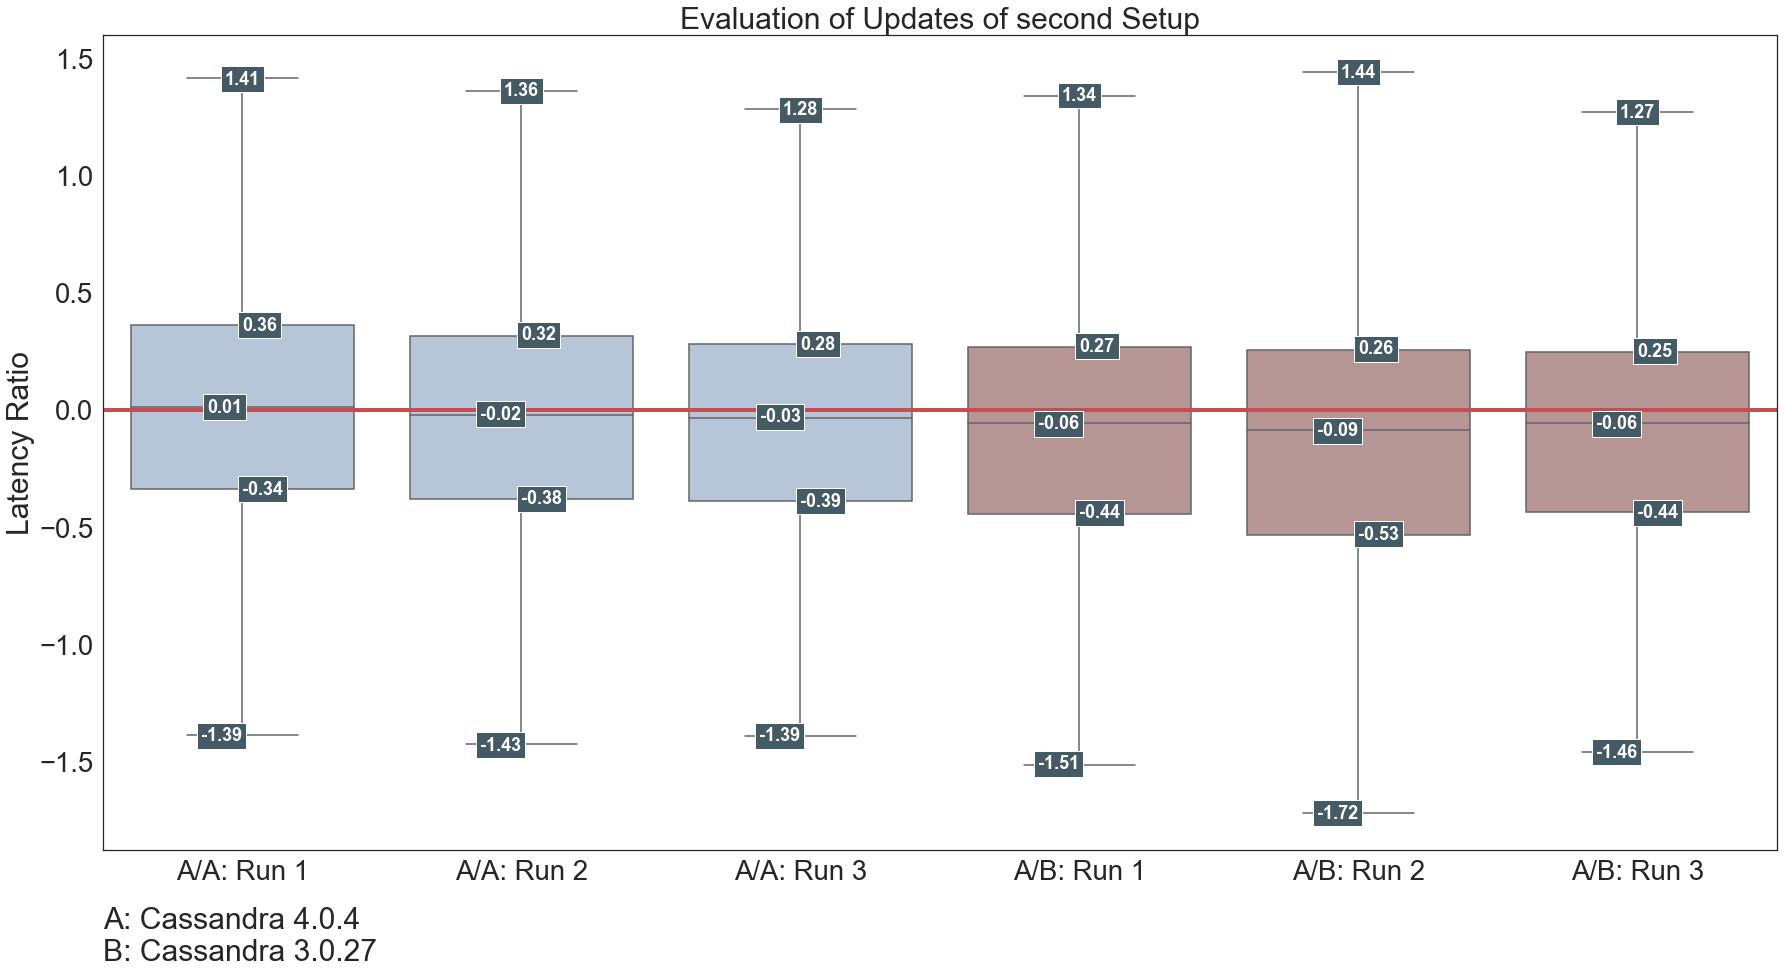

In [47]:
if not setup1: 
    combined_dfs = pd.DataFrame({"A/A: Run 1": queryDfAA1Update['latency_ratio'],
                                "A/A: Run 2": queryDfAA2Update['latency_ratio'], 
                                "A/A: Run 3": queryDfAA3Update['latency_ratio'], 
                                "A/B: Run 1": queryDfAB1Update['latency_ratio'], 
                                "A/B: Run 2": queryDfAB2Update['latency_ratio'], 
                                "A/B: Run 3": queryDfAB3Update['latency_ratio']})

    sns.set_style('white')
    sns.set_context('notebook', font_scale=2.50)


    my_pal = {"A/A: Run 1": "lightsteelblue", "A/A: Run 2": "lightsteelblue", "A/A: Run 3":"lightsteelblue", "A/B: Run 1": "rosybrown", "A/B: Run 2": "rosybrown", "A/B: Run 3": "rosybrown"}
    box_plot = sns.boxplot(data=combined_dfs, color='white', showfliers=False, whis=1.5,palette=my_pal).set_title("Evaluation of Updates of second Setup")

    ax = box_plot.axes
    ax.set_ylabel("Latency Ratio")
    lines = ax.get_lines()

    categories = ax.get_xticks()

    for i in range(0,5):
        for cat in categories:

            y = round(lines[(i+cat*5)].get_ydata()[0],2) 

            match i:
                case 0:
                    posh= 'left'
                    posv= 'center'
                case 1: 
                    posh='left'
                    posv='center'
                case 2:
                    posh='right'
                    posv='center'
                case 4:
                    posh='right'
                    posv='center'
                case _: 
                    posh='center'
                    posv='center'


            ax.text(
                cat, 
                y, 
                f'{y}', 
                ha=posh, 
                va=posv, 
                fontweight='bold', 
                size=18,
                color='white',
                bbox=dict(facecolor='#445A64'))

    plt.axhline(y = 0,color='r',linewidth=4)
    plt.text(-0.5,-2.35,'A: Cassandra 4.0.4\nB: Cassandra 3.0.27')

    #sns.despine()
    sns.set(rc={'figure.figsize':(30,15)})



In [48]:
if not setup1: 
    queryDfAA1Read["latency_difference"]=queryDfAA1Read["latency_ms_A"]-queryDfAA1Read["latency_ms_B"]
    queryDfAA2Read["latency_difference"]=queryDfAA2Read["latency_ms_A"]-queryDfAA2Read["latency_ms_B"]
    queryDfAA3Read["latency_difference"]=queryDfAA3Read["latency_ms_A"]-queryDfAA3Read["latency_ms_B"]

    queryDfAB1Read["latency_difference"]=queryDfAB1Read["latency_ms_A"]-queryDfAB1Read["latency_ms_B"]
    queryDfAB2Read["latency_difference"]=queryDfAB2Read["latency_ms_A"]-queryDfAB2Read["latency_ms_B"]
    queryDfAB3Read["latency_difference"]=queryDfAB3Read["latency_ms_A"]-queryDfAB3Read["latency_ms_B"]

C:\Users\Felix Medicus\AppData\Local\Temp\ipykernel_11464\2678141666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  queryDfAA1Read["latency_difference"]=queryDfAA1Read["latency_ms_A"]-queryDfAA1Read["latency_ms_B"]
C:\Users\Felix Medicus\AppData\Local\Temp\ipykernel_11464\2678141666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  queryDfAA2Read["latency_difference"]=queryDfAA2Read["latency_ms_A"]-queryDfAA2Read["latency_ms_B"]
C:\Users\Felix Medicus\AppData\Local\Temp\ipykernel_11464\2678141666.py:

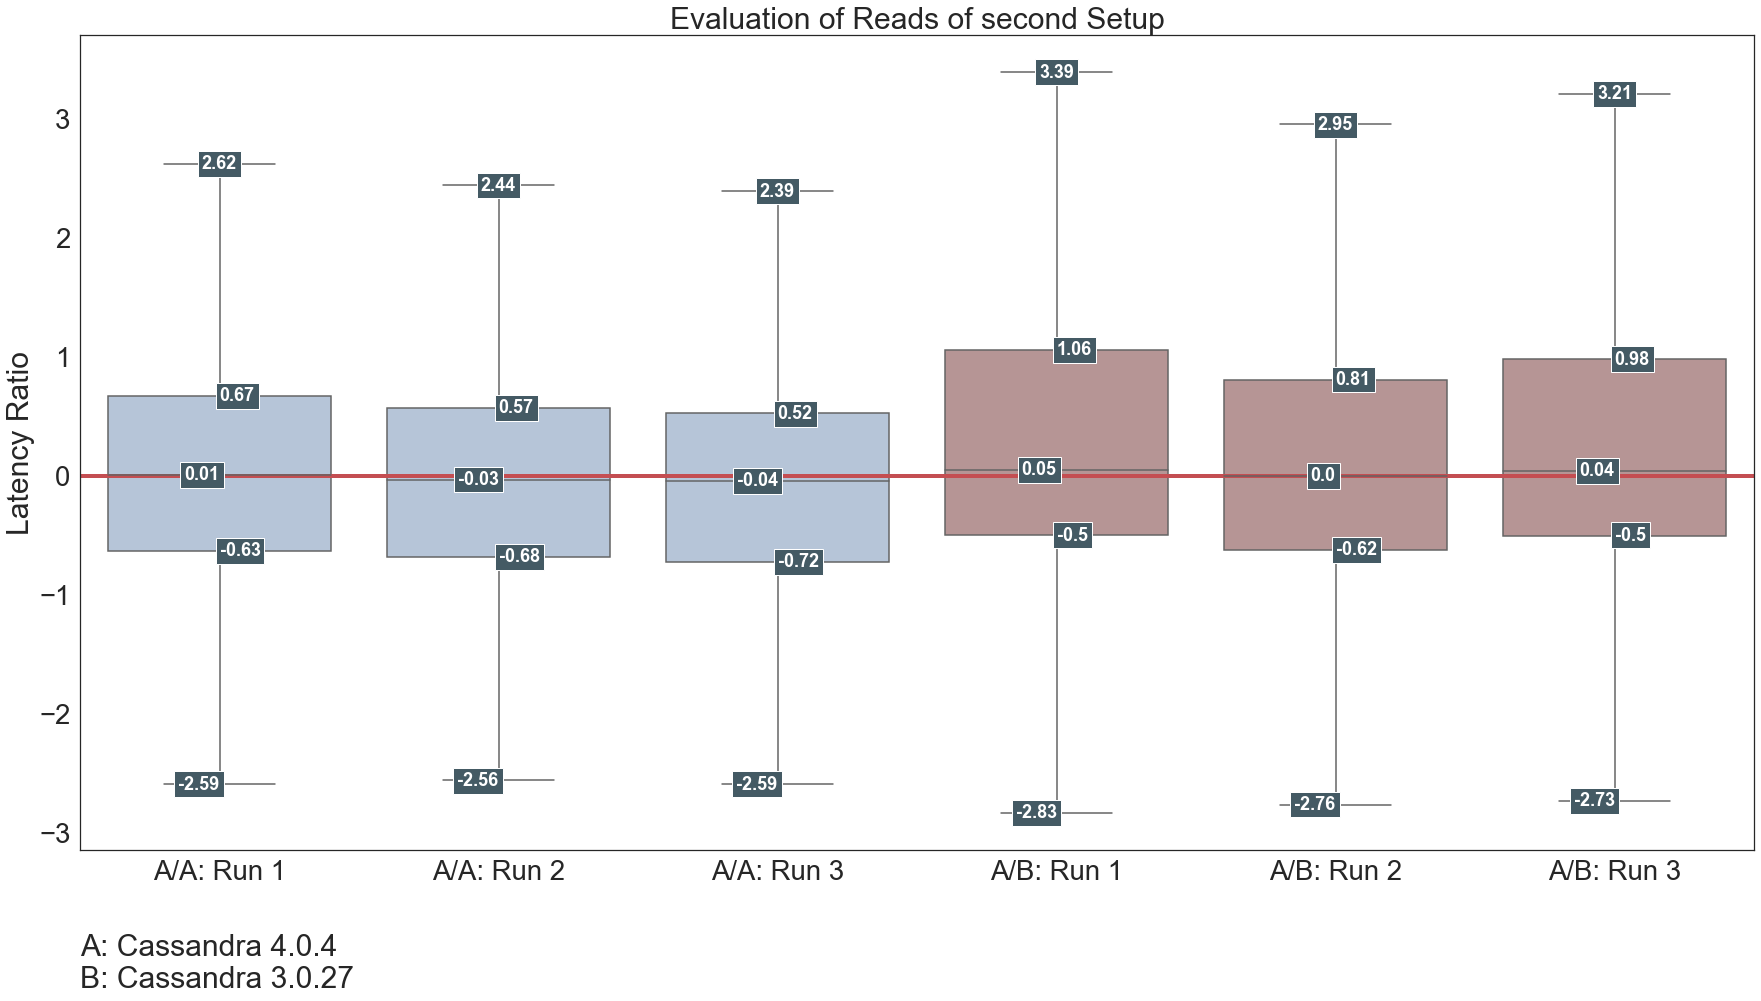

In [57]:
if not setup1: 
    combined_dfs = pd.DataFrame({"A/A: Run 1": queryDfAA1Read['latency_ratio'],
                                "A/A: Run 2": queryDfAA2Read['latency_ratio'], 
                                "A/A: Run 3": queryDfAA3Read['latency_ratio'], 
                                "A/B: Run 1": queryDfAB1Read['latency_ratio'], 
                                "A/B: Run 2": queryDfAB2Read['latency_ratio'], 
                                "A/B: Run 3": queryDfAB3Read['latency_ratio']})

    sns.set_style('white')
    sns.set_context('notebook', font_scale=2.50)


    my_pal = {"A/A: Run 1": "lightsteelblue", "A/A: Run 2": "lightsteelblue", "A/A: Run 3":"lightsteelblue", "A/B: Run 1": "rosybrown", "A/B: Run 2": "rosybrown", "A/B: Run 3": "rosybrown"}
    box_plot = sns.boxplot(data=combined_dfs, color='white', showfliers=False,palette=my_pal).set_title("Evaluation of Reads of second Setup")





    ax = box_plot.axes
    ax.set_ylabel("Latency Ratio")
    lines = ax.get_lines()

    categories = ax.get_xticks()

    for i in range(0,5):
        for cat in categories:

            y = round(lines[(i+cat*5)].get_ydata()[0],2) 

            match i:
                case 0:
                    posh= 'left'
                    posv= 'center'
                case 1: 
                    posh='left'
                    posv='center'
                case 2:
                    posh='right'
                    posv='center'
                case 4:
                    posh='right'
                    posv='center'
                case _: 
                    posh='center'
                    posv='center'


            ax.text(
                cat, 
                y, 
                f'{y}', 
                ha=posh, 
                va=posv, 
                fontweight='bold', 
                size=18,
                color='white',
                bbox=dict(facecolor='#445A64'))

    plt.axhline(y = 0,color='r',linewidth=4)
    plt.text(-0.5,-4.3,'A: Cassandra 4.0.4\nB: Cassandra 3.0.27')

    #sns.despine()
    sns.set(rc={'figure.figsize':(30,15)})



In [50]:
if setup1: 
    combined_dfs = pd.DataFrame({'A/A: Run 1': queryDfAA1["latency_ratio"],
                                "A/A: Run 2": queryDfAA2["latency_ratio"], 
                                "A/A: Run 3": queryDfAA3["latency_ratio"], 
                                "A/B: Run 1": queryDfAB1["latency_ratio"], 
                                "A/B: Run 2": queryDfAB2["latency_ratio"], 
                                "A/B: Run 3": queryDfAB3["latency_ratio"]})
    
   
    sns.set_style('white')
    sns.set_context('notebook', font_scale=2.50)


    my_pal = {"A/A: Run 1": "lightsteelblue", "A/A: Run 2": "lightsteelblue", "A/A: Run 3":"lightsteelblue", "A/B: Run 1": "rosybrown", "A/B: Run 2": "rosybrown", "A/B: Run 3": "rosybrown"}
    bar_plot = sns.barplot(x = combined_dfs.mean().index, y = combined_dfs.mean(),palette=my_pal).set_title("Evaluation of Reads' Average Latency Ratios of first Setup")





    ax = bar_plot.axes
    ax.set_ylabel("Latency Ratio")
    lines = ax.get_lines()

    categories = ax.get_xticks()

  

    plt.axhline(y = 0,color='r',linewidth=4)
    plt.text(-0.5,-2.05,'A: Cassandra 4.0.4\nB: Cassandra 3.0.27')
    #sns.despine()
    sns.set(rc={'figure.figsize':(30,15)})



### Create Barchart with Averages of Latency Ratio

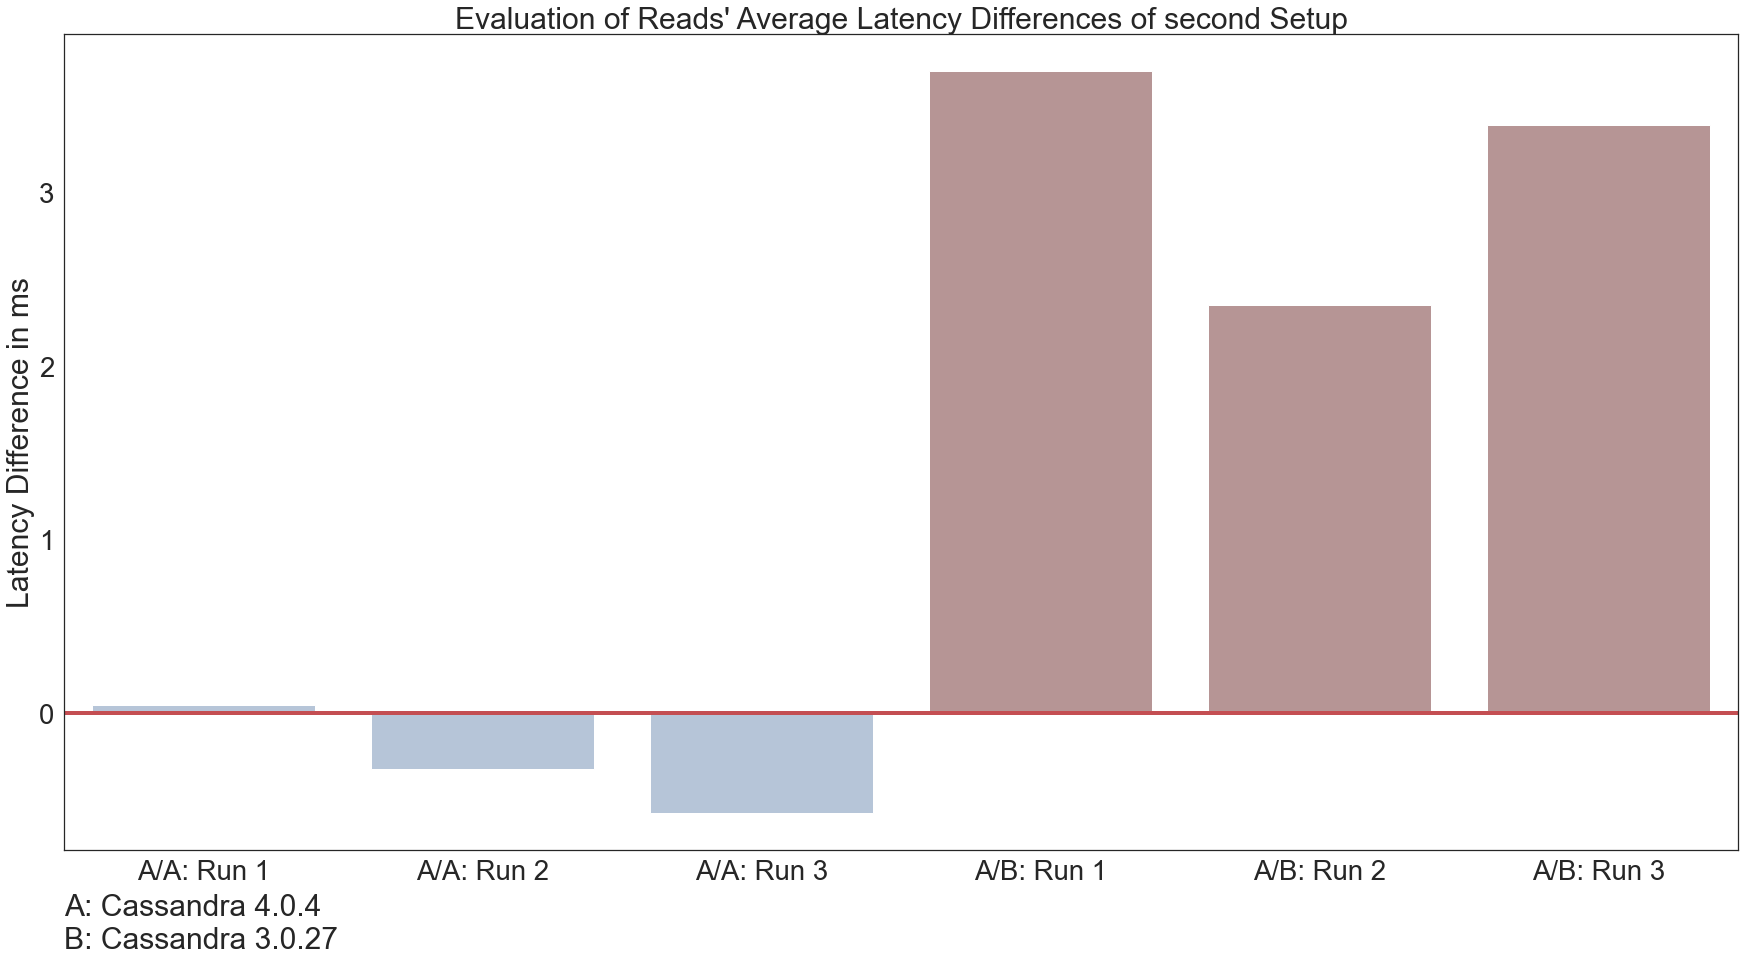

In [51]:
if not setup1: 
    combined_dfs = pd.DataFrame({'A/A: Run 1': queryDfAA1Read["latency_difference"],
                                "A/A: Run 2": queryDfAA2Read["latency_difference"], 
                                "A/A: Run 3": queryDfAA3Read["latency_difference"], 
                                "A/B: Run 1": queryDfAB1Read["latency_difference"], 
                                "A/B: Run 2": queryDfAB2Read["latency_difference"], 
                                "A/B: Run 3": queryDfAB3Read["latency_difference"]})
    
   
    sns.set_style('white')
    sns.set_context('notebook', font_scale=2.50)


    my_pal = {"A/A: Run 1": "lightsteelblue", "A/A: Run 2": "lightsteelblue", "A/A: Run 3":"lightsteelblue", "A/B: Run 1": "rosybrown", "A/B: Run 2": "rosybrown", "A/B: Run 3": "rosybrown"}
    bar_plot = sns.barplot(x = combined_dfs.mean().index, y = combined_dfs.mean(),palette=my_pal).set_title("Evaluation of Reads' Average Latency Differences of second Setup")





    ax = bar_plot.axes
    ax.set_ylabel("Latency Difference in ms")
    lines = ax.get_lines()


    plt.axhline(y = 0,color='r',linewidth=4)
    plt.text(-0.5,-1.35,'A: Cassandra 4.0.4\nB: Cassandra 3.0.27')

    #sns.despine()
    sns.set(rc={'figure.figsize':(30,15)})



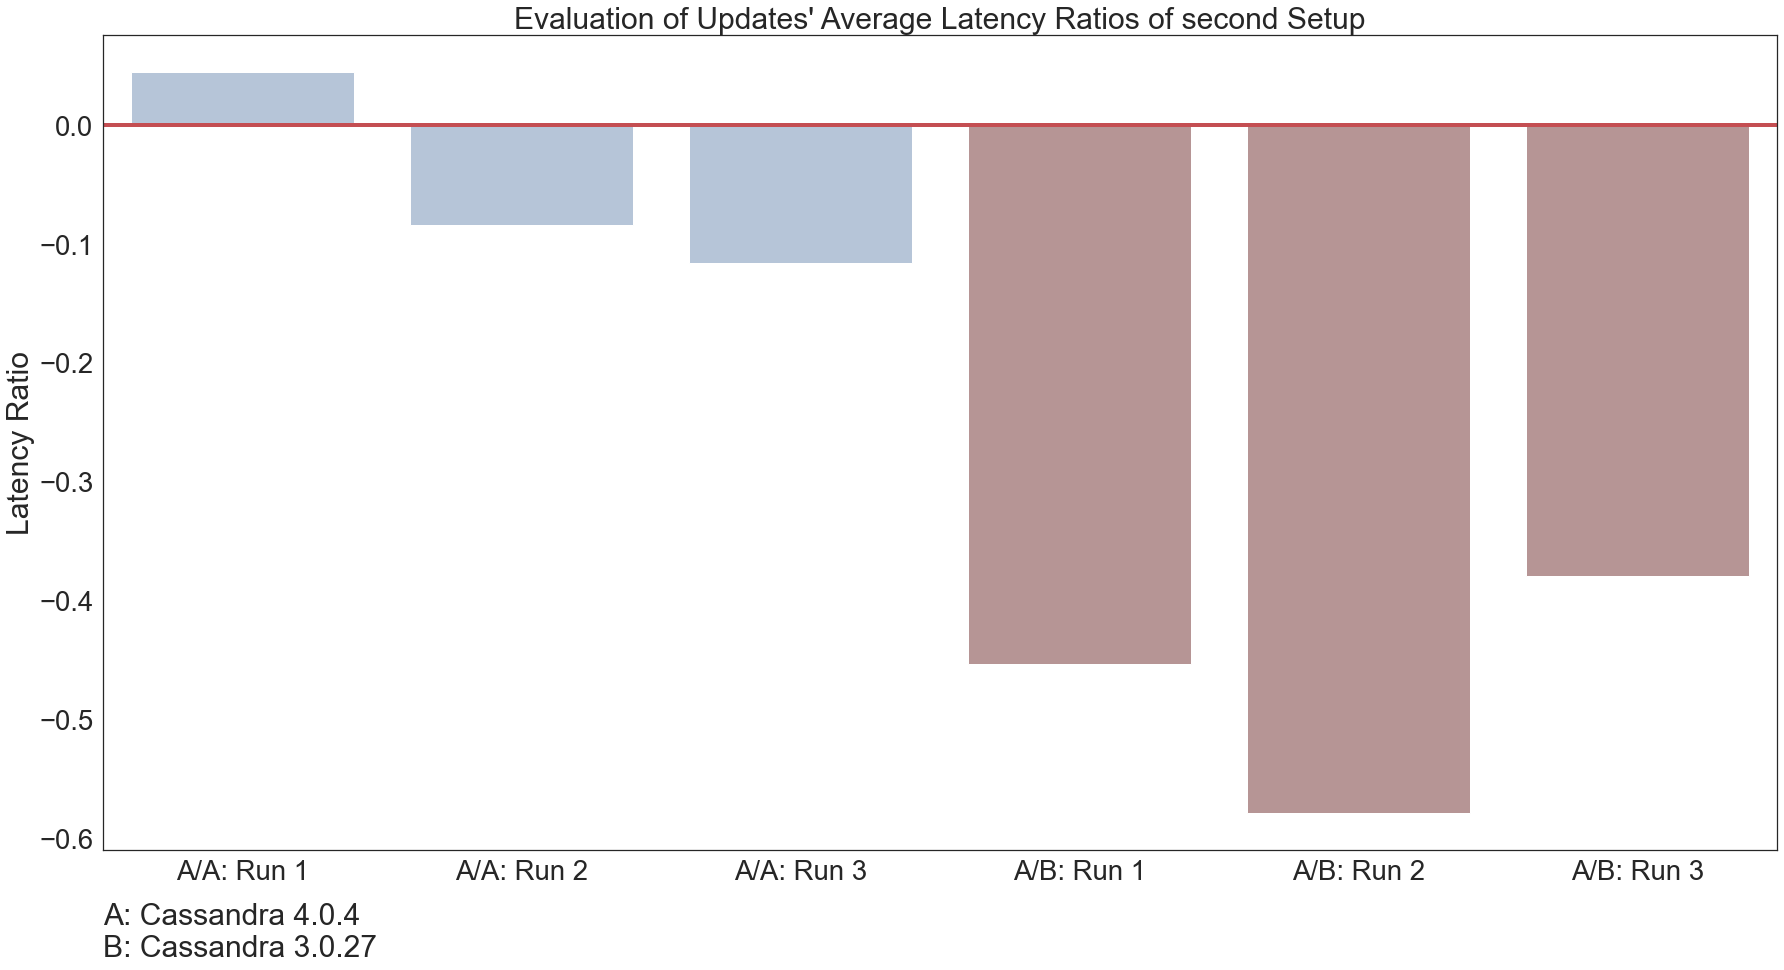

In [52]:
if not setup1: 
    combined_dfs = pd.DataFrame({'A/A: Run 1': queryDfAA1Update["latency_ratio"],
                                "A/A: Run 2": queryDfAA2Update["latency_ratio"], 
                                "A/A: Run 3": queryDfAA3Update["latency_ratio"], 
                                "A/B: Run 1": queryDfAB1Update["latency_ratio"], 
                                "A/B: Run 2": queryDfAB2Update["latency_ratio"], 
                                "A/B: Run 3": queryDfAB3Update["latency_ratio"]})
    

    sns.set_style('white')
    sns.set_context('notebook', font_scale=2.50)


    my_pal = {"A/A: Run 1": "lightsteelblue", "A/A: Run 2": "lightsteelblue", "A/A: Run 3":"lightsteelblue", "A/B: Run 1": "rosybrown", "A/B: Run 2": "rosybrown", "A/B: Run 3": "rosybrown"}
    bar_plot = sns.barplot(x = combined_dfs.mean().index, y = combined_dfs.mean(),palette=my_pal).set_title("Evaluation of Updates' Average Latency Ratios of second Setup")





    ax = bar_plot.axes
    ax.set_ylabel("Latency Ratio")
    lines = ax.get_lines()

    

    plt.axhline(y = 0,color='r',linewidth=4)
    plt.text(-0.5,-.7,'A: Cassandra 4.0.4\nB: Cassandra 3.0.27')

    #sns.despine()
    sns.set(rc={'figure.figsize':(30,15)})



### Calculate Sum of Latency Ratios for A and for B 

In [53]:
if setup1: 
    ratioSum = queryDfAB1["latency_ratio"].sum() + queryDfAB2["latency_ratio"].sum() + queryDfAB3["latency_ratio"].sum()
    print(ratioSum)
else: 
    ratioSumRead=queryDfAB1Read["latency_ratio"].sum()+queryDfAB2Read["latency_ratio"].sum()+queryDfAB3Read["latency_ratio"].sum()
    ratioSumUpdate=queryDfAB1Update["latency_ratio"].sum()+queryDfAB2Update["latency_ratio"].sum()+queryDfAB3Update["latency_ratio"].sum()
    
    print("Read Sum", ratioSumRead)
    print("Update Sum", ratioSumUpdate)

Read Sum 1225248.8039193135
Update Sum -270476.04972625524
